In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
# 날짜 데이터 생성 패키지
from datetime import datetime

In [2]:
ds_currency = pd.read_csv('./실습파일/환율.csv', engine = 'python', parse_dates = ["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


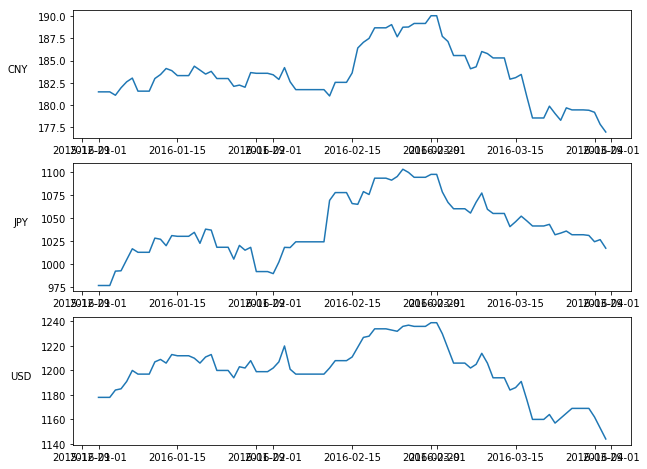

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))
for (ax, idx, currency) in zip([ax1, ax2, ax3],[311,312,313],["CNY","JPY","USD"]):
    ax.plot("APPL_DATE","STD_RATE",data = ds_currency[ds_currency["CURRENCY"]==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [12]:
ds_currency_CNY = ds_currency[ds_currency["CURRENCY"] == "CNY"].set_index("APPL_DATE")
ds_currency_CNY.drop(["CURRENCY","USD_CONV_DATE"],axis= 1,inplace = True)

ds_currency_JPY = ds_currency[ds_currency["CURRENCY"] == "JPY"].set_index("APPL_DATE")
ds_currency_JPY.drop(["CURRENCY","USD_CONV_DATE"],axis= 1,inplace = True)

ds_currency_USD = ds_currency[ds_currency["CURRENCY"] == "USD"].set_index("APPL_DATE")
ds_currency_USD.drop(["CURRENCY","USD_CONV_DATE"],axis= 1,inplace = True)

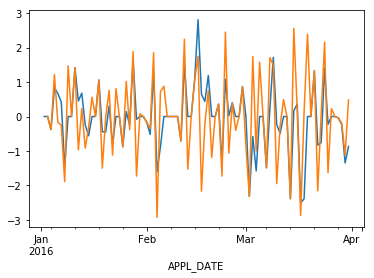

In [14]:
ds_cny_diff1 = ds_currency_CNY["STD_RATE"] - ds_currency_CNY["STD_RATE"].shift(1)
ds_cny_diff1.plot()
ds_cny_diff2 = ds_currency_CNY["STD_RATE"] - 2*(ds_currency_CNY["STD_RATE"].shift(1))+\
(ds_currency_CNY["STD_RATE"].shift(2))
ds_cny_diff2.plot()